Artifical Neural Network

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.rc('axes', labelsize=14)
plt.rc('font', size=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

The Preceptron

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target==0)

per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,42


In [ ]:
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)

In [ ]:
y_pred

array([ True, False])

The Perceptron is equivalent to a SGDClassifier with loss="perceptron", no regularization, and a constant learning rate equal to 1:

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron",penalty=None,learning_rate="constant",eta0=1,random_state=42)

sgd_clf.fit(X, y)

,loss,'perceptron'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [ ]:
X_new = [[2, 0.5], [3, 1]]
y_pred = sgd_clf.predict(X_new)

In [ ]:
y_pred

array([ True, False])

In [ ]:
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

Multilayer Perceptron Regression

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full, random_state=42)
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50],
random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

In [ ]:
rmse

0.5053326657968437

Implement the MLPs with Keras

Image Classifier Using Sequential API

In [1]:
import tensorflow as tf

fashion_minst = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_minst
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
X_train.shape

(55000, 28, 28)

In [3]:
X_train.dtype

dtype('uint8')

Scale the values

In [4]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test/255.

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
"Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[0]]

'Ankle boot'

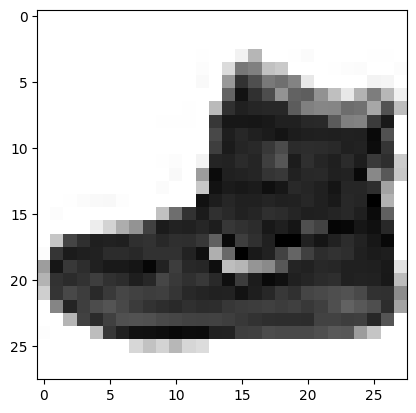

In [17]:
plt.imshow(X_train[0], cmap='binary')
plt.show()

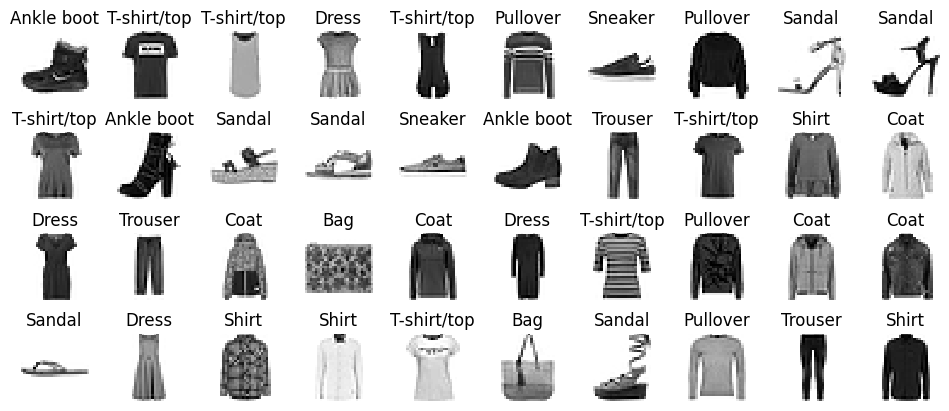

In [44]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

Sequential Model

Method 1: Making model

In [19]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Method 2: Making model

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [24]:
model.get_layer('dense_3') is hidden1

True

In [26]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.03693951, -0.05705538, -0.06809407, ..., -0.02987221,
        -0.0336265 ,  0.07265872],
       [-0.03426948, -0.05204143,  0.03479773, ...,  0.05330026,
         0.03854405, -0.02029993],
       [ 0.03782611, -0.00960441,  0.04243829, ...,  0.00982177,
         0.03767126, -0.07375813],
       ...,
       [ 0.00845113, -0.00443184, -0.01441204, ...,  0.02093739,
         0.06522097, -0.06321725],
       [ 0.05829373,  0.06950811,  0.0519508 , ..., -0.04201979,
         0.06129231, -0.03827882],
       [ 0.06727104, -0.03700593, -0.03030581, ..., -0.00792111,
        -0.04282702, -0.05277783]], dtype=float32)

In [27]:
weights.shape

(784, 300)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
biases.shape

(300,)

In [30]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [31]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6873 - loss: 0.9768 - val_accuracy: 0.8304 - val_loss: 0.5000
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8265 - loss: 0.5040 - val_accuracy: 0.8428 - val_loss: 0.4524
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8425 - loss: 0.4521 - val_accuracy: 0.8456 - val_loss: 0.4305
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8531 - loss: 0.4230 - val_accuracy: 0.8524 - val_loss: 0.4154
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8601 - loss: 0.4017 - val_accuracy: 0.8546 - val_loss: 0.4074
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8664 - loss: 0.3847 - val_accuracy: 0.8578 - val_loss: 0.3991
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8702 - loss: 0.3703 - val_accuracy: 0.8574 - val_loss: 0.3943
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8750 - loss: 0.3578 -

In [41]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [43]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


Making the Predictions

In [32]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.02, 0.  , 0.72],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Getting the highest probability class

In [33]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [38]:
# this code will convert to class ids into one-hot encode
to_hot = tf.keras.utils.to_categorical(y_new)
to_hot

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [40]:
# this code will convert to one-hot into class-ids encode
np.argmax(to_hot, axis=1)

array([9, 2, 1])

Building Regression MLPs using Sequential API